# 👽👾 Sci-fi IRL #2: PrintSF 📚🛸

#### A Predictive Machine Learning Model by Tobias Reaper

#### ---- Datalogue 02-008-03 ----

---
---

## Outline

1. Intro
2. Predict
  - Can use a "star" component if predicting
3. Explain / Insights / Analysis
  - Methodology
  - Choice of features
  - Feature engineering
  - Choice of model
  - Choice of metrics
4. Process
  - Size of data
  - Cross-Validation method + train / test

---

## TODOjo

#### Data Hygiene

- [ ] Remove Outliers

#### Modeling

- [ ] Get baseline linear regression using a single feature
- [ ] RandomizedSearchCV

#### Model Interpretation

- Feature Importances
- Interactions
- Partial Dependencies

---
---

### Imports and Configuration

📥⚙️

In [1]:
# The Utiliteers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extrateers
import seaborn as sns
import janitor
import os

In [2]:
# Plotly imports
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly"  # Set to dark mode

In [3]:
# Jupyter + Plotly imports (if running in Colab or Visual Studio Code, comment out this cell)
import plotly.offline as pyo
pyo.init_notebook_mode()  # Set plotly to notebook mode / work offline

In [4]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [5]:
# Set pandas display options to allow for more columns and rows
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

ML Imports

In [6]:
# ML Infrastructure
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [7]:
# Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [8]:
# Logistical Imports
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

---

### Data Loadingz

In [9]:
# Define path to current session directory - 008
datapath = "/Users/Tobias/workshop/dasci/projects/thepurpledot_dev/stories/sci_fi_irl-02/008-Session/"

# Create path to the books dataset
filename = "must_read_books_008-02.csv"

filepath = os.path.join(datapath, filename)
filepath

'/Users/Tobias/workshop/dasci/projects/thepurpledot_dev/stories/sci_fi_irl-02/008-Session/must_read_books_008-02.csv'

In [10]:
# Load the data
df1 = pd.read_csv(filepath)

In [11]:
print(df1.shape)
df1.head(2)

(18573, 48)


title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   

   european_literature  memoir  fantasy  religion  horror  humor  \
0                False   False    False      True   False  False   
1                 True   False    False     False   False  False   

   historical_fiction  classics  adventure  autobiography  nonfiction  novels  \
0               False     False      False          False        True   False   
1               False      True      False          False        True   False   

   biography    war  paranormal  historical  thriller  cultural  philosophy  \
0      False  False       False       False     False     False       False   
1      False  False       False       False     False      True        True   

   childrens  literature  young_adult  mystery  science_fiction  contemporary  \
0      False       False        False    False            False         False   
1      False        True        False    False            False         False   

   crime  history  romance  fiction  short_stories  publish_year  \
0  False    False    False    False          False        2013.0   
1  False     True    False    False          False        2003.0   

   publish_month  publish_day  1_rating_count  2_rating_count  3_rating_count  \
0           10.0         22.0          7520.0          2697.0          2521.0   
1            6.0          1.0          5254.0         16827.0         61182.0   

   4_rating_count  5_rating_count  in_series  has_charlist  has_setting  
0          1963.0         56654.0      False         False        False  
1         80221.0         66231.0      False          True        False

---

### Simple Encodings

In [12]:
df2 = df1.replace(to_replace={True: 1, False:0})

In [13]:
# # Save the current dataframe to file
# df2.to_csv("must_read_books_008-03.csv", index=False)

---

### Visualizations

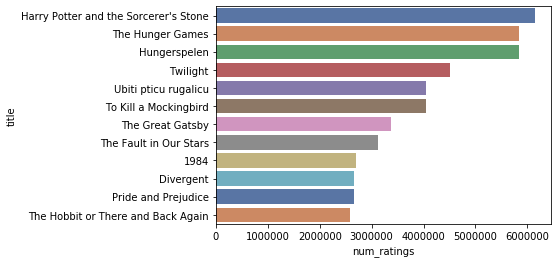

In [18]:
# Books with the most ratings
hiratings = df2.nlargest(20, ["num_ratings"]).set_index("title")["num_ratings"]
sns.barplot(hiratings, hiratings.index, palette="deep");
plt.savefig("books_most_ratings.png", dpi=150)

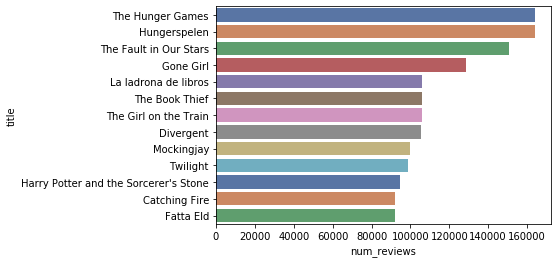

In [19]:
# Books with the most reviews
hireviews = df2.nlargest(24, ["num_reviews"]).set_index("title")["num_reviews"]
sns.barplot(hireviews, hireviews.index, palette="deep");
plt.savefig("books_most_reviews.png", dpi=150)

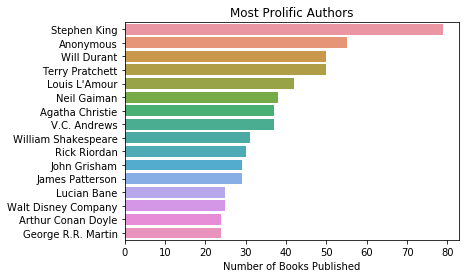

In [20]:
# Most prolific authors
prolifics = df2["author"].value_counts().head(16)
sns.barplot(prolifics, prolifics.index)
plt.title("Most Prolific Authors")
plt.xlabel("Number of Books Published");
plt.savefig("authors_most_books.png", dpi=150)

---

### Looking for Outliers

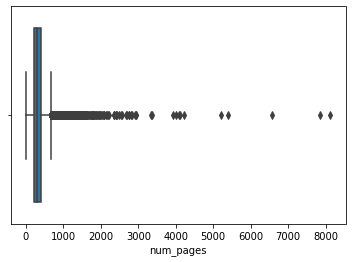

In [21]:
# To find outliers in numerical features, utilize boxplot
sns.boxplot(x=df2["num_pages"]);

In [22]:
# See how much removing pages outliers affects dataset
# This could even be one of the sliders on the app
cutoff = 1000
df3 = df2[df2["num_pages"] <= cutoff]
print(f"There are {df2.shape[0] - df3.shape[0]} books above {cutoff} pages long.")
print(f"The resulting dataset has {df3.shape[0]} rows.")

There are 949 books above 1000 pages long.
The resulting dataset has 17624 rows.


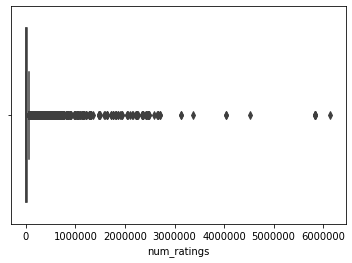

In [23]:
# To find outliers in numerical features, utilize boxplot
sns.boxplot(x=df3["num_ratings"]);

In [24]:
# See how much removing ratings outliers affects dataset
cutoff = 1000000
df4 = df3[df3["num_ratings"] <= cutoff]
print(f"There are {df3.shape[0] - df4.shape[0]} books with above {cutoff} ratings.")
print(f"The resulting dataset has {df4.shape[0]} rows.")

There are 129 books with above 1000000 ratings.
The resulting dataset has 17495 rows.


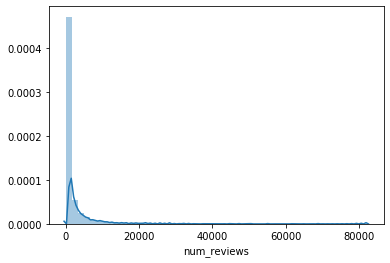

In [25]:
sns.distplot(df4["num_reviews"]);

In [26]:
# See how much removing ratings outliers affects dataset
cutoff = 20000
df5 = df4[df4["num_reviews"] <= cutoff]
print(f"There are {df4.shape[0] - df5.shape[0]} books with above {cutoff} reviews.")
print(f"The resulting dataset has {df5.shape[0]} rows.")

There are 319 books with above 20000 reviews.
The resulting dataset has 17176 rows.


In [27]:
# See how much removing ratings outliers affects dataset
cutoff = 1940
df6 = df5[df5["publish_year"] >= cutoff]
print(f"There are {df5.shape[0] - df6.shape[0]} books published before {cutoff}.")
print(f"The resulting dataset has {df6.shape[0]} rows.")

There are 216 books published before 1940.
The resulting dataset has 16960 rows.


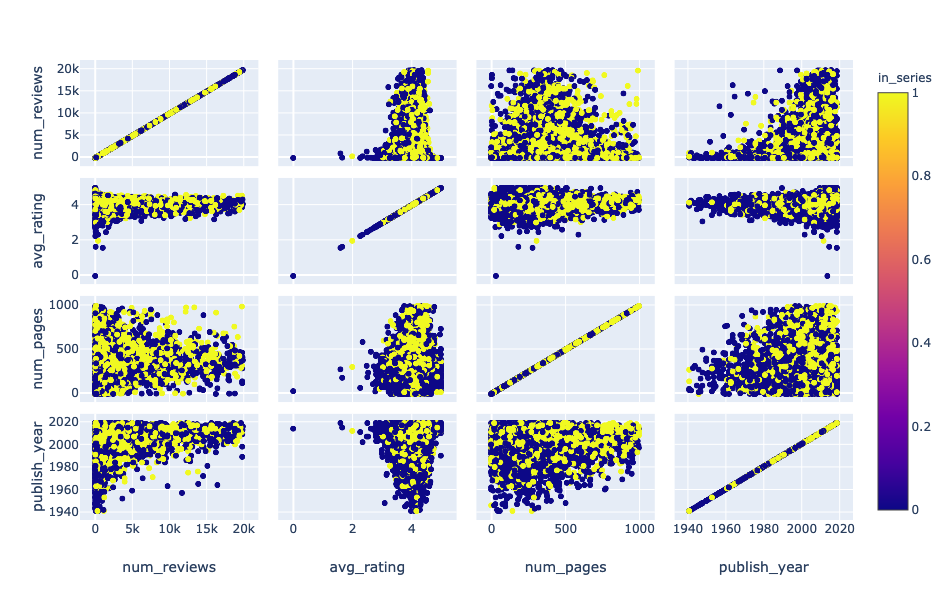

In [86]:
# Scatter Matrix
fig = px.scatter_matrix(df6, dimensions=["num_reviews", "avg_rating", "num_pages", "publish_year"], color="in_series")
fig.show()

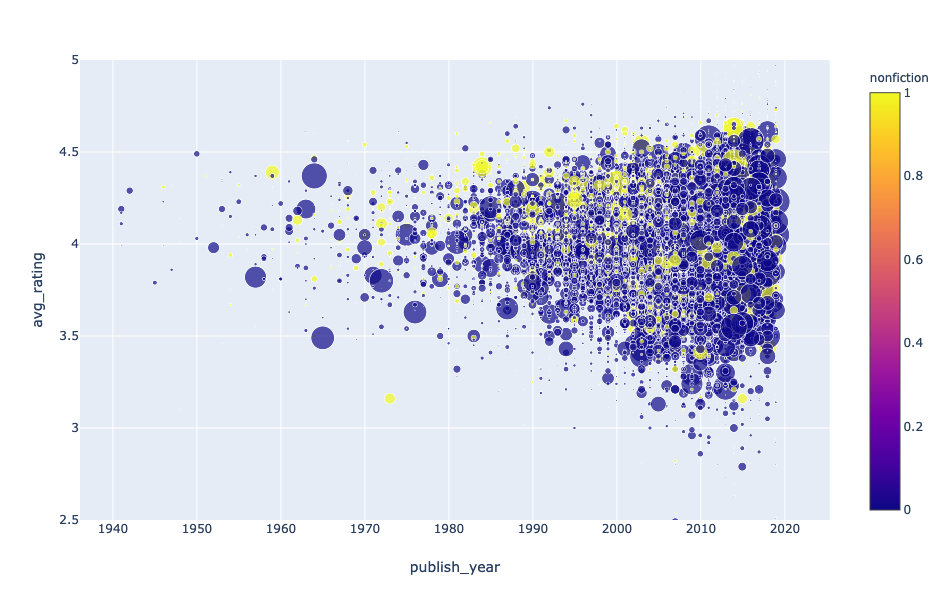

In [90]:
# A little more complex scatter, without outliers
px.scatter(df6, x="publish_year", y="avg_rating", size="num_reviews", color="nonfiction", range_y=[2.5, 5])

---
---

# Target Practice 🎯 `avg_rating`

Predictive Modeling

---

#### Preprocessing

In [29]:
# Split up data into train / test
# No validation set because I will be using cross-validation
train, test = train_test_split(df6, test_size=0.2, random_state=92)
train.shape, test.shape

((13568, 48), (3392, 48))

In [30]:
# Define target
target = "avg_rating"

y_train = train[target]
y_test = test[target]
y_train.shape, y_test.shape

((13568,), (3392,))

---

#### Begin With Basic Linear Baseline

In [31]:
# Define features for baseline linear regression
base_features = [
    "num_ratings",
    "num_pages",
]

X1_train = train[base_features]
X1_test = test[base_features]

X1_train.shape, X1_test.shape

((13568, 2), (3392, 2))

In [32]:
# Create baseline linreg pipeline
pipe1 = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="median"),
    LinearRegression(),
)

In [33]:
# Fit the pipeline on the training data
pipe1.fit(X1_train, y_train)

# Make the predictions
y1_pred = pipe1.predict(X1_test)

In [34]:
y_test.shape, y1_pred.shape

((3392,), (3392,))

In [35]:
print(f"Baseline linear regression model using {base_features} gives an R^2 of: \n{round(r2_score(y_test, y1_pred), 4)}")

Baseline linear regression model using ['num_ratings', 'num_pages'] gives an R^2 of: 
0.0053


In [36]:
# Get the baseline cross-validation scores
scores1 = cross_val_score(pipe1, X1_train, y_train, cv=10)

In [37]:
# Get R-squared scores for the cross-validated model
print(f"R-squared score with simple linear regression using {base_features}: %0.5f (+/- %0.5f)" % (scores1.mean(), scores1.std() * 2))

R-squared score with simple linear regression using ['num_ratings', 'num_pages']: 0.00415 (+/- 0.01349)


---

#### Another Basic Linear Baseline

> This time, using all features.

In [38]:
# Arrange X matrices

X2_train = train.drop(columns=[target])
X2_test = test.drop(columns=[target])

X2_train.shape, X2_test.shape

((13568, 47), (3392, 47))

In [39]:
# Create baseline linreg pipeline
pipe2 = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="median"),
    LinearRegression(),
)

In [40]:
# Fit the pipeline on the training data
pipe2.fit(X2_train, y_train)

# Make the predictions
y2_pred = pipe2.predict(X2_test)

assert y_test.shape[0] == y2_pred.shape[0]

In [41]:
print(f"Baseline linear regression model using all features gives an R^2 of: \n{round(r2_score(y_test, y2_pred), 4)}")

Baseline linear regression model using all features gives an R^2 of: 
0.1991


In [42]:
# Get the baseline cross-validation scores
scores2 = cross_val_score(pipe2, X2_train, y_train, cv=10)

In [43]:
# Get R^2 scores for the cross-validated model
print("R^2 score with simple linear regression using all features: %0.5f (+/- %0.5f)" % (scores2.mean(), scores2.std() * 2))

R^2 score with simple linear regression using all features: 0.20140 (+/- 0.05577)


---

## Gradient Boost Regressor

In [44]:
# Define the gradient boosting pipeline
pipe3 = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="median"),
    XGBRegressor(max_depth=16, n_estimators=200, objective="reg:squarederror", n_jobs=-1),
)

pipe3.fit(X2_train, y_train)  # Fit the pipeline

# Make the predictions
y3_pred = pipe3.predict(X2_test)

assert y_test.shape[0] == y3_pred.shape[0]

print(f"Gradient-boosted regression model using all features gives an R^2 of: \n{round(r2_score(y_test, y3_pred), 4)}")

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



Gradient-boosted regression model using all features gives an R^2 of: 
0.9648


In [45]:
# Get the cv scores
scores3 = cross_val_score(pipe3, X2_train, y_train, cv=10)

# Get R^2 scores for the model
print("R^2 score with XGBRegressor using all features:\n %0.5f (+/- %0.5f)" % (scores3.mean(), scores3.std() * 2))

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/Tobias/.vega/dasci/lib/python3.7/site-package

R^2 score with XGBRegressor using all features:
 0.95535 (+/- 0.06443)


---

## Dr. Doless

I'm a little suspicious of the R^2 score being so high. My guess is there is some leakage from the target to the features.

> Time to figure out which ones are causing the leaky hull, mateys!

# 🏴‍☠️

In [ ]:
train.columns.tolist()

In [138]:
# Columns to drop
leaky_candidates = [
    "1_rating_count",
    "2_rating_count",
    "3_rating_count",
    "4_rating_count",
    "5_rating_count",
]

# Arrange X4 matrices
X4_train = train.drop(columns=[target] + leaky_candidates)
X4_test = test.drop(columns=[target] + leaky_candidates)

X4_train.shape, X4_test.shape

((13568, 42), (3392, 42))

In [155]:
X4_train.head(2)

title        author  \
9189                                              Quiver  Jacob Chance   
11682  Wallace: The Underdog Who Conquered a Sport, S...    Jim Gorant   

       num_ratings  num_reviews  num_pages language  european_literature  \
9189         732.0        241.0      117.0  English                    0   
11682       1132.0        174.0      272.0  English                    0   

       memoir  fantasy  religion  horror  humor  historical_fiction  classics  \
9189        0        0         0       0      0                   0         0   
11682       1        0         0       0      0                   0         0   

       adventure  autobiography  nonfiction  novels  biography  war  \
9189           0              0           0       0          0    0   
11682          0              1           1       0          1    0   

       paranormal  historical  thriller  cultural  philosophy  childrens  \
9189            0           0         0         0           0          0   
11682           0           0         0         0           0          0   

       literature  young_adult  mystery  science_fiction  contemporary  crime  \
9189            0            0        0                0             1      0   
11682           0            0        0                0             0      0   

       history  romance  fiction  short_stories  publish_year  publish_month  \
9189         0        1        0              0        2016.0            9.0   
11682        0        0        0              0        2012.0            8.0   

       publish_day  in_series  has_charlist  has_setting  
9189           6.0          1             0            0  
11682         30.0          0             0            0

In [145]:
# Define the gradient boosting pipeline
pipe4 = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="median"),
    XGBRegressor(max_depth=16, n_estimators=200, objective="reg:squarederror", n_jobs=-1),
)

pipe4.fit(X4_train, y_train)  # Fit the pipeline

# Make the predictions
y4_pred = pipe4.predict(X4_test)

assert y_test.shape[0] == y4_pred.shape[0]

print(f"Gradient-boosted regression model using most features gives an R^2 of: \n{round(r2_score(y_test, y4_pred), 4)}")

Gradient-boosted regression model using most features gives an R^2 of: 
0.0551


> Yep...that's a little more realistic. $R^2 = 0.551$ is maybe a bit _too_ real, though. 😢

I'm going to do one more attempt before changing my tactics. This time I'm going to change the `objective` parameter.

I just tried it above, as it also suppresses the FutureWarning that was crowding up the output - some deprecation warning.

And doing the cross-validation below...

In [147]:
# Get the cv scores
scores4 = cross_val_score(pipe4, X4_train, y_train, cv=10)

# Get R^2 scores for the model
print("R^2 score with XGBRegressor using all features:\n %0.5f (+/- %0.5f)" % (scores4.mean(), scores4.std() * 2))

R^2 score with XGBRegressor using all features:
 0.16649 (+/- 0.32382)


Ohhh kayy well it's an improvement at least.

> _There's hope!_

I could try hyperparameter tuning.

However, I like the idea of predicting fiction vs nonfiction.

---

### More feature engineering

I noticed that the "nonfiction" is not consistent nor exhaustive of all nonfiction genres. I will create a new feature that is an interaction feature between the genres - based on _any_ of the nonfiction genres being present.

> The goal is to get a feature that accurately portrays the number of nonfiction vs fiction books.

This could even be considered target engineering, as I could try to predict whether a book is fiction or not.

I actually think that this target makes the whole model more interesting.

In [135]:
df6.head(2)

title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  \
0      71355.0       5704.0        4.37      531.0  English   
1     229715.0       7261.0        3.81      140.0  English   

   european_literature  memoir  fantasy  religion  horror  humor  \
0                    0       0        0         1       0      0   
1                    1       0        0         0       0      0   

   historical_fiction  classics  adventure  autobiography  nonfiction  novels  \
0                   0         0          0              0           1       0   
1                   0         1          0              0           1       0   

   biography  war  paranormal  historical  thriller  cultural  philosophy  \
0          0    0           0           0         0         0           0   
1          0    0           0           0         0         1           1   

   childrens  literature  young_adult  mystery  science_fiction  contemporary  \
0          0           0            0        0                0             0   
1          0           1            0        0                0             0   

   crime  history  romance  fiction  short_stories  publish_year  \
0      0        0        0        0              0        2013.0   
1      0        1        0        0              0        2003.0   

   publish_month  publish_day  1_rating_count  2_rating_count  3_rating_count  \
0           10.0         22.0          7520.0          2697.0          2521.0   
1            6.0          1.0          5254.0         16827.0         61182.0   

   4_rating_count  5_rating_count  in_series  has_charlist  has_setting  
0          1963.0         56654.0          0             0            0  
1         80221.0         66231.0          0             1            0

In [133]:
df6["nonfiction"].value_counts()

0    12850
1     4110
Name: nonfiction, dtype: int64

In [ ]:
nonfiction = [  # List of columns considered nonfiction
    "memoir",
    "autobiography",
    "nonfiction",
    "biography",
    "historical",
]

In [152]:
# Use pyjanitor's `update_where()` method to engineer the new feature
df7 = (df6
       .update_where(
           conditions=((df6["memoir"] == 1) | 
                      (df6["autobiography"] == 1) | 
                      (df6["nonfiction"] == 1) | 
                      (df6["biography"] == 1) | 
                      (df6["historical"] == 1)),
           target_column_name="all_nonfiction",
           target_val=1,
       )
       .fill_empty(column_names="all_nonfiction", value=0)
       .change_type("all_nonfiction", int)
      )

In [154]:
df7["all_nonfiction"].value_counts()

0    10386
1     6574
Name: all_nonfiction, dtype: int64

That's a little better - up to about 1/3 nonfiction.

If I really wanted to get it as accurate as possible, I could re-load the data from before I cleaned it and all that and include the top 50 or 100 genres, then sift through that and do that same thing.

It's a little too late for that, though. Once again...

> If I have the time!

---

In [158]:
print("Hello there.")

Hello there.


In [159]:
print("...just thought of something...")

...just thought of something...


In [157]:
df7["fiction"].value_counts()

1    8888
0    8072
Name: fiction, dtype: int64

# 🤦🏻‍♂️

I could've just used that. instead of engineering the new one.

Oh well. I had fun learning how to utilize `|` and `.update_where()`.

Now I want to see if there is any overlap between `fiction` and my new feature `all_nonfiction`.

In [160]:
# Use pyjanitor's `update_where()` once again, this time for an &
df8 = (df7
       .update_where(
           conditions=((df7["fiction"] == 1) & 
                      (df7["all_nonfiction"] == 1)),
           target_column_name="overlap",
           target_val=1,
       )
      )

In [161]:
df8["overlap"].value_counts()

1.0    2122
Name: overlap, dtype: int64

In [162]:
df8["overlap"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: overlap, dtype: float64

In [174]:
# Another good way to find these would be to filter
df7_f1 = df7[(df7["fiction"] == 1) & (df7["all_nonfiction"] == 1)]
df7_f1.shape

(2122, 50)

In [176]:
df7_f1.head(2)

title          author  num_ratings  num_reviews  \
5   The Education of Little Tree  Forrest Carter      13659.0       1551.0   
12       The Forty Rules of Love     Elif Shafak     106236.0      13460.0   

    avg_rating  num_pages language  european_literature  memoir  fantasy  \
5         4.11      228.0  English                    0       0        0   
12        4.16      354.0  English                    0       0        0   

    religion  horror  humor  historical_fiction  classics  adventure  \
5          0       0      0                   1         1          0   
12         0       0      0                   1         0          0   

    autobiography  nonfiction  novels  biography  war  paranormal  historical  \
5               0           0       0          0    0           0           1   
12              0           0       1          0    0           0           1   

    thriller  cultural  philosophy  childrens  literature  young_adult  \
5          0         0           0          0           0            1   
12         0         0           0          0           0            0   

    mystery  science_fiction  contemporary  crime  history  romance  fiction  \
5         0                0             0      0        0        0        1   
12        0                0             0      0        0        0        1   

    short_stories  publish_year  publish_month  publish_day  1_rating_count  \
5               0        2001.0            8.0         31.0           284.0   
12              0        2010.0            2.0         18.0          3106.0   

    2_rating_count  3_rating_count  4_rating_count  5_rating_count  in_series  \
5            610.0          2292.0          4644.0          5829.0          0   
12          5315.0         14959.0         31311.0         51545.0          0   

    has_charlist  has_setting  all_nonfiction  overlap  
5              0            0               1      1.0  
12             1            0               1      1.0

I see...I included `historical` in nonfiction and it isn't necessarily nonfiction.

> I'll use `fiction` as target practice

In [180]:
# Find out if "short_stories" is leaky
df7_f2 = df7[(df7["fiction"] == 0) & (df7["short_stories"] == 1)]
df7_f2.shape

# Verdict is it doesn't look leaky to me.

(128, 50)

> Other potential leaks could be settings + characters.

---

## Target Practice 🎯`fiction`

> Binary Classification

Is it fiction or is in fuction?

In [211]:
# Clean up the dataset to remove all the extra genre fields
genre_cols = [
    "european_literature",
    "memoir",
    "fantasy",
    "religion",
    "horror",
    "humor",
    "historical_fiction",
    "classics",
    "adventure",
    "autobiography",
    "nonfiction",
    "novels",
    "biography",
    "war",
    "paranormal",
    "historical",
    "thriller",
    "cultural",
    "philosophy",
    "childrens",
    "literature",
    "young_adult",
    "mystery",
    "science_fiction",
    "contemporary",
    "crime",
    "history",
    "romance",
    "all_nonfiction",
    "overlap",
]

df8 = df7.drop(columns=genre_cols)

df8.shape

(16960, 20)

In [212]:
df8.head(2)

title               author  \
0  The Book of Mormon: Another Testament of Jesus...            Anonymous   
1                                         The Prince  Niccolò Machiavelli   

   num_ratings  num_reviews  avg_rating  num_pages language  fiction  \
0      71355.0       5704.0        4.37      531.0  English        0   
1     229715.0       7261.0        3.81      140.0  English        0   

   short_stories  publish_year  publish_month  publish_day  1_rating_count  \
0              0        2013.0           10.0         22.0          7520.0   
1              0        2003.0            6.0          1.0          5254.0   

   2_rating_count  3_rating_count  4_rating_count  5_rating_count  in_series  \
0          2697.0          2521.0          1963.0         56654.0          0   
1         16827.0         61182.0         80221.0         66231.0          0   

   has_charlist  has_setting  
0             0            0  
1             1            0

In [213]:
# Split up data into train / test
# No validation set because I will be using cross-validation
train2, test2 = train_test_split(df8, test_size=0.2, random_state=92)
train2.shape, test2.shape

((13568, 20), (3392, 20))

In [214]:
# Define new target "fiction"
target2 = "fiction"

y2_train = train2[target2]
y2_test = test2[target2]
y2_train.shape, y2_test.shape

((13568,), (3392,))

---

#### Majority Baseline

In [216]:
y2_train.value_counts(normalize=True)

1    0.524543
0    0.475457
Name: fiction, dtype: float64

In [217]:
# Get the mode (aka the majoratahhh class)
maj_class = y2_train.mode()[0]
maj_class

1

In [218]:
# Create predictions of 100% grass-fed respect-mah-majoritaahhh
y2k_pred = [maj_class] * len(y2_train)

In [219]:
# See how we did!!
accuracy_score(y2_train, y2k_pred)

0.5245430424528302

...not too shabby.

Actually...yes it is. Almost as bad as I could get with binary classification.

Just my luck. That's the best I can do.

# 🥺

## $JK!$ I can do better.

> Starting with Logistic Regression

---

### Basic Logistic Baseline

_Unit 2, Sprint 1, Module 4_

> This time, using a couple features and the `fiction` target!

In [225]:
# Arrange X matrices - using X21 to keep numbering organized
X21_train = train2.drop(columns=[target2])  # i.e. X 2.1
X21_test = test2.drop(columns=[target2])

X21_train.shape, X21_test.shape

((13568, 19), (3392, 19))

In [226]:
# Create basslinic logistic pipeline
pipe21 = make_pipeline(  # i.e. X 2.1
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy="median"),
    LogisticRegressionCV(cv=10, n_jobs=-1, random_state=92),
)

In [227]:
# Fit the pipeline on the training data
pipe21.fit(X21_train, y2_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['title', 'author', 'language'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'title',
                                          'data_type': dtype('O'),
                                          'mapping': Quiver                                                                                                                     1
Wallace: The Underdog Who Conquered a Sport, Saved a Marriage, and Championed Pit Bulls-- One Flying Disc at a Time        2
No Choice But Seduction                                                                                                    3
Welco...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                           

In [228]:
# Get the baseline cross-validation accuracy scores
scores21 = cross_val_score(pipe21, X21_train, y2_train, cv=5)

In [229]:
# Get accuracy scores for the cross-validated logistic model
print("Accuracy score with simple logistic regression using all features: %0.5f (+/- %0.5f)" % (scores21.mean(), scores21.std() * 2))

Accuracy score with simple logistic regression using all features: 0.70880 (+/- 0.02032)


---

## State of the Patience

> ...it pays off!

---
---